Importing libraries for Lasso, Ridge, ElasticNet and model evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, root_mean_squared_error
import matplotlib.pyplot as plt

Loading the cleaned diabetes dataset and previewing the first rows:

In [3]:
# Load Data
path='/content/diabetes_cleaned.csv'
df=pd.read_csv(path)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5.0,18.0,15.0,1,0,9.0,4.0,3.0
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3.0,0.0,0.0,0,0,7.0,6.0,1.0
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5.0,30.0,30.0,1,0,9.0,4.0,8.0
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2.0,0.0,0.0,0,0,11.0,3.0,6.0
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2.0,3.0,0.0,0,0,11.0,5.0,4.0


In [4]:
df['BMI_squared'] = df['BMI']**2

Splitting features ( X ) and target ( y ) for model training

In [6]:
features = [c for c in df.columns if c not in ['Diabetes_binary']]
X = df[features]
y = df['Diabetes_binary']

print(X.shape,y.shape)

(229474, 22) (229474,)


Running Lasso regression with cross-validation to find the best lambda and key features

In [7]:
#log space for alpha ( lambda )
param_grid = {'alpha': np.logspace(-4,1,10)}

#increase iter for convergence with small data
lasso = Lasso(max_iter=10000)

grid_search = GridSearchCV(lasso,
                           param_grid,
                           cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X,y)

best_alpha = grid_search.best_params_['alpha']
best_lasso = grid_search.best_estimator_

print("Best lambda ( alpha ):",best_alpha)
print("Coefficients : ")
print(pd.Series(best_lasso.coef_,
                index=features).sort_values(ascending=False))
print("Intercept : ",best_lasso.intercept_)

Best lambda ( alpha ): 0.0001
Coefficients : 
HighBP                  0.074881
HeartDiseaseorAttack    0.062557
HighChol                0.058698
GenHlth                 0.048580
CholCheck               0.041086
DiffWalk                0.039364
Stroke                  0.033982
Sex                     0.017935
BMI                     0.017153
AnyHealthcare           0.012217
Age                     0.008325
PhysHlth               -0.000017
BMI_squared            -0.000140
Fruits                 -0.000223
MentHlth               -0.000595
Veggies                -0.000892
Education              -0.002037
PhysActivity           -0.003640
Smoker                 -0.005434
Income                 -0.006437
NoDocbcCost            -0.006614
HvyAlcoholConsump      -0.049984
dtype: float64
Intercept :  -0.4853290220951245


Running Ridge regression to shrink coefficients but keep all features

In [8]:
ridge = Ridge()
grid_search = GridSearchCV(ridge,
                           param_grid,
                           cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X,y)
best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_

print("Best lambda ( alpha ):",best_alpha)
print("Coefficients : ")
print(pd.Series(best_ridge.coef_,index=features).sort_values(ascending=False))
print("Intercept : ",best_ridge.intercept_)

Best lambda ( alpha ): 10.0
Coefficients : 
HighBP                  0.075047
HeartDiseaseorAttack    0.063248
HighChol                0.058917
GenHlth                 0.048500
CholCheck               0.043264
DiffWalk                0.040036
Stroke                  0.036007
Sex                     0.018337
BMI                     0.017127
AnyHealthcare           0.013820
Age                     0.008233
PhysHlth               -0.000040
BMI_squared            -0.000140
Fruits                 -0.000539
MentHlth               -0.000592
Veggies                -0.001246
Education              -0.002121
PhysActivity           -0.004056
Smoker                 -0.005899
Income                 -0.006451
NoDocbcCost            -0.007608
HvyAlcoholConsump      -0.051524
dtype: float64
Intercept :  -0.4861778073717201


Running Elastic Net as a mix of Lasso and Ridge, tuning alpha and l1_ratio

In [9]:
param_grid_en = {'alpha':np.logspace(-4,1,10),'l1_ratio':np.linspace(0.1,0.9,5)}

en = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(en,
                           param_grid_en,
                           cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X,y)

best_params = grid_search.best_params_
best_en = grid_search.best_estimator_

print("Best params : ",best_params)
print("Coefficients : ")
print(pd.Series(best_en.coef_,index=features).sort_values(ascending=False))
print("Intercept : ",best_en.intercept_)

Best params :  {'alpha': np.float64(0.0001), 'l1_ratio': np.float64(0.1)}
Coefficients : 
HighBP                  0.075018
HeartDiseaseorAttack    0.063151
HighChol                0.058888
GenHlth                 0.048510
CholCheck               0.042996
DiffWalk                0.039955
Stroke                  0.035772
Sex                     0.018294
BMI                     0.017131
AnyHealthcare           0.013653
Age                     0.008245
PhysHlth               -0.000037
BMI_squared            -0.000140
Fruits                 -0.000507
MentHlth               -0.000593
Veggies                -0.001212
Education              -0.002113
PhysActivity           -0.004015
Smoker                 -0.005852
Income                 -0.006451
NoDocbcCost            -0.007505
HvyAlcoholConsump      -0.051325
dtype: float64
Intercept :  -0.48606934530142853


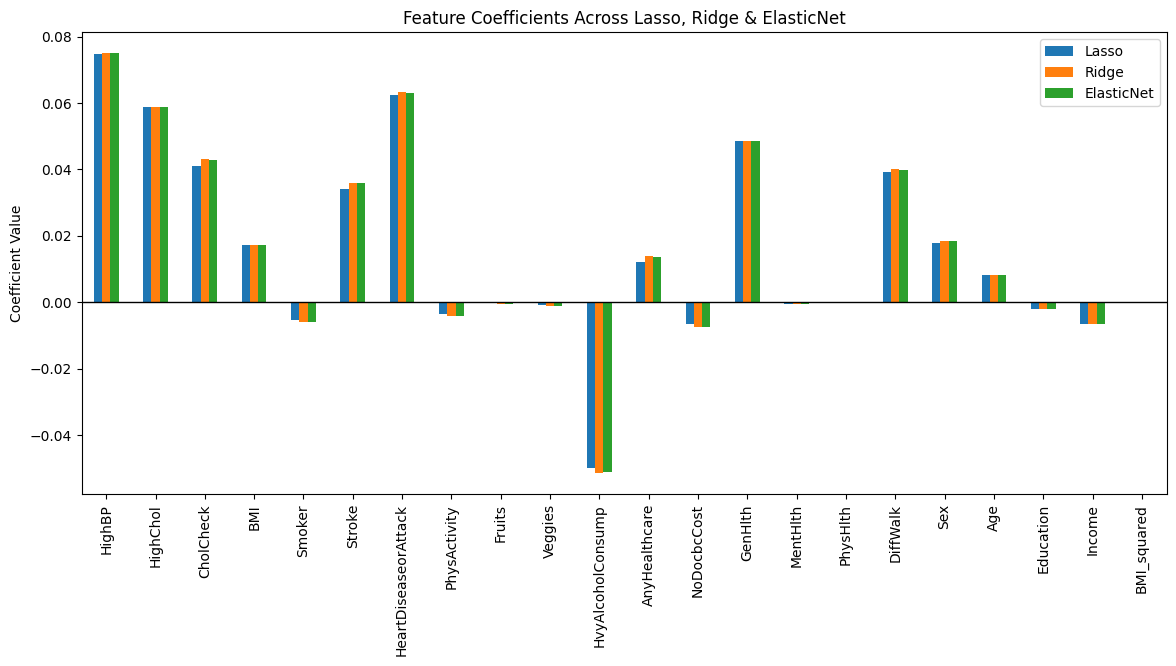

In [10]:
coefs = pd.DataFrame({
    "Lasso": best_lasso.coef_,
    "Ridge": best_ridge.coef_,
    "ElasticNet": best_en.coef_
}, index=features)

coefs.plot(kind="bar",figsize=(14,6))
plt.axhline(0,color="black",linewidth=1)
plt.title("Feature Coefficients Across Lasso, Ridge & ElasticNet")
plt.ylabel("Coefficient Value")
plt.show()


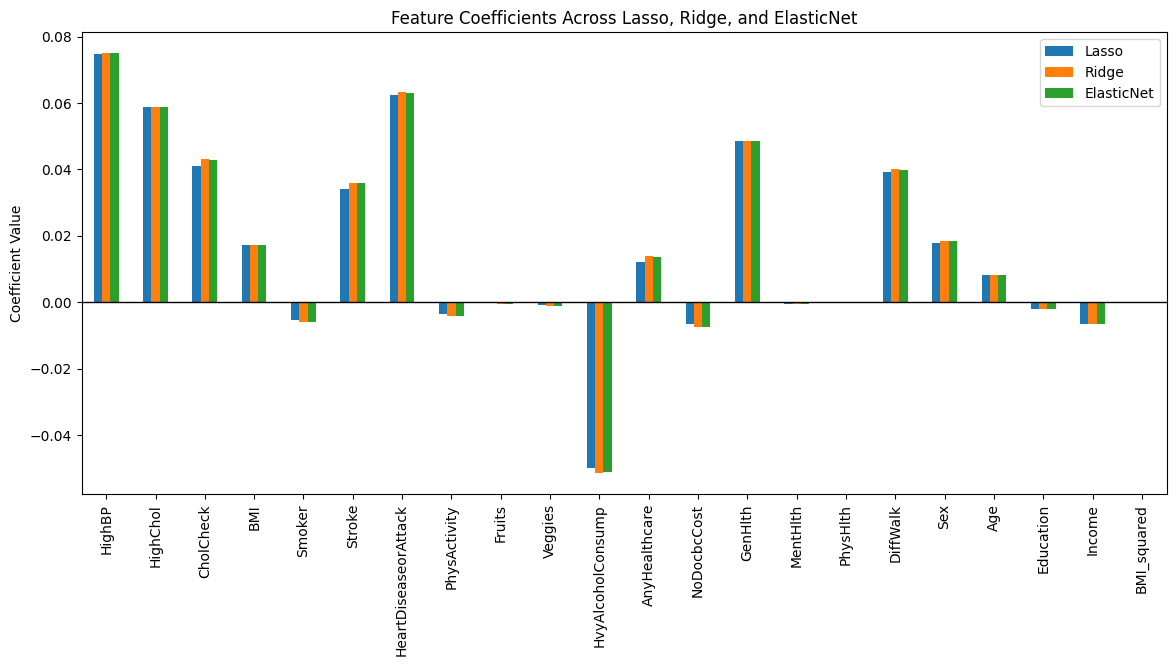

In [11]:
coefs = pd.DataFrame({
    "Lasso": best_lasso.coef_,
    "Ridge": best_ridge.coef_,
    "ElasticNet": best_en.coef_
}, index=features)

coefs.plot(kind="bar",figsize=(14,6))
plt.axhline(0,color="black",linewidth=1)
plt.title("Feature Coefficients Across Lasso, Ridge, and ElasticNet")
plt.ylabel("Coefficient Value")
plt.show()


#### Graph Explanation
This graph shows which features increase the chance of diabetes (bars above zero) and which features decrease it (bars below zero). HighBP, HighChol, GenHlth and DiffWalk strongly raise the risk, while PhysActivity, Income and HvyAlcoholConsump slightly lower it. Overall, all three models (Lasso, Ridge, ElasticNet) follow a very similar pattern.

Comparing Lasso, Ridge, and ElasticNet using cross-validation RMSE

In [12]:
models = [
    ('Lasso', best_lasso),
    ('Ridge', best_ridge),
    ('ElasticNet', best_en)
]

for name, model in models:
    scores = cross_val_score(model, X, y, cv=3, scoring='neg_root_mean_squared_error')
    print(f"{name} mean CV RMSE: {-scores.mean()}")

Lasso mean CV RMSE: 0.3307032705802828
Ridge mean CV RMSE: 0.3306995796056408
ElasticNet mean CV RMSE: 0.3306997875802462
